# Steps

1. Importing the libraries
2. Importing the datasets
3. Data Cleaning, Data Exploration, Data Manipulation, Data Visualisation
4. EDA - Exploratory Data Analysis
5. Spliting the dataset
6. Choosing the model
7. Training the model
8. Testing the model
9. Model Evaluation
10. [Optional] Export the dataset into the .csv format

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Problem Statement

Given a dataset which captures the salary from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore.

# Importing the dataset

Link: https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Linear%20Regression%20Baltimore-Salary%20Prediction/train.csv


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Linear%20Regression%20Baltimore-Salary%20Prediction/train.csv')

In [3]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [4]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [6]:
df.shape

(18981, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [8]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Miller,Cassandra",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [9]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [40]:
# Making a copy of the original DataFrame
newdf = df.copy()

In [41]:
# Removing the leading & trailing spaces and converting all the columns into the lowercase
newdf.columns= newdf.columns.str.strip().str.lower()

In [12]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [13]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [15]:
# Checking for null values
newdf.isnull().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [42]:
# Delete the column GrossPay
newdf.drop('grosspay', axis=1, inplace=True)

In [17]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [18]:
newdf.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18976    W02235
18977    W02629
18978    A99416
18979    A99262
18980    A50206
Name: agencyid, Length: 18981, dtype: object

In [19]:
# Values_counts for agencyid
newdf.agencyid.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02099      1
W02591      1
W02695      1
W07901      1
W02678      1
Name: agencyid, Length: 1177, dtype: int64

In [20]:
newdf.agency.value_counts()

Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
M-R Labor Commissioner         6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: agency, Length: 65, dtype: int64

In [21]:
newdf[newdf['agencyid']=='P04001']['agency']

23       R&P-Recreation (part-ti
34       R&P-Recreation (part-ti
86       R&P-Recreation (part-ti
130      R&P-Recreation (part-ti
151      R&P-Recreation (part-ti
                  ...           
18764    R&P-Recreation (part-ti
18814    R&P-Recreation (part-ti
18938    R&P-Recreation (part-ti
18943    R&P-Recreation (part-ti
18957    R&P-Recreation (part-ti
Name: agency, Length: 316, dtype: object

In [22]:
newdf.agencyid.value_counts().map(newdf.agency)

P04001    HLTH-Health Department 
C90786             Youth Summer  
W02629         Police Department 
P04002           DPW-Solid Waste 
A99416             Youth Summer  
                   ...           
W02099        OED-Employment Dev 
W02591        OED-Employment Dev 
W02695        OED-Employment Dev 
W07901        OED-Employment Dev 
W02678        OED-Employment Dev 
Name: agencyid, Length: 1177, dtype: object

In [24]:
newdf[newdf['agencyid']=='W02591']['agency']

10569    Youth Summer  
Name: agency, dtype: object

In [25]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [27]:
len(newdf[newdf.agencyid == 'P04001']['agency'])

316

$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$48900.00        1
$73791.00        1
$100436.00       1
$82200.00        1
$156000.00       1
Name: annualsalary, Length: 1590, dtype: int64

In [30]:
newdf.annualsalary.value_counts()

$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$48900.00        1
$73791.00        1
$100436.00       1
$82200.00        1
$156000.00       1
Name: annualsalary, Length: 1590, dtype: int64

In [62]:
# Remove the $ from the annualsalary column and change the dtype to integer
newdf['annualsalary'] = newdf['annualsalary'].str.strip('$').astype(float)

In [63]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [66]:
# hiredate - hireday, hiremonth, hireyear (int)
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hireday,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,NaN,NaN,NaN
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,NaN,NaN,NaN
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,NaN,NaN,NaN
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,NaN,NaN,NaN
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,NaN,NaN,NaN


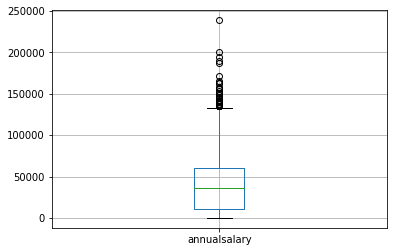

In [69]:
# Plot a BoxPlot for the annualsalary column
dumm.annualsalary.plot.box()
plt.grid()

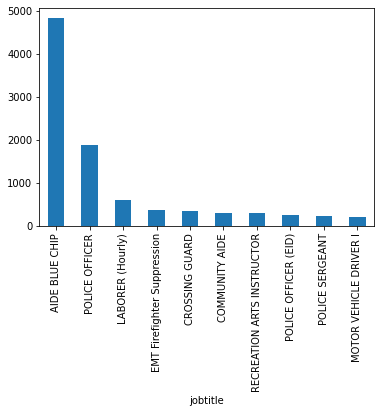

In [72]:
# Plot top 10 Jobs based on hiring
dumm.groupby(['jobtitle'])['name'].count().sort_values(ascending=False).head(10).plot.bar()

In [77]:
# Plot top 10 jobs with the highest salary


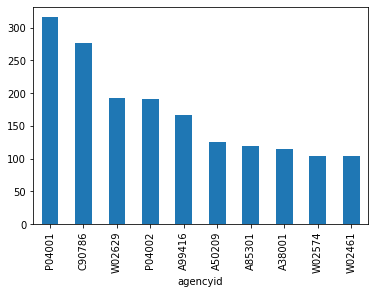

In [78]:
# Plot top 10 Agency's ID that has highest number of Employees
dumm.groupby(['agencyid'])['name'].count().sort_values(ascending=False).head(10).plot.bar()

In [ ]:
# Plot Highest Salary V/s Year graph


In [ ]:
# Plot Average Salary V/s Year graph


In [ ]:
# Plot a graph to check on which month most of the people are hired


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


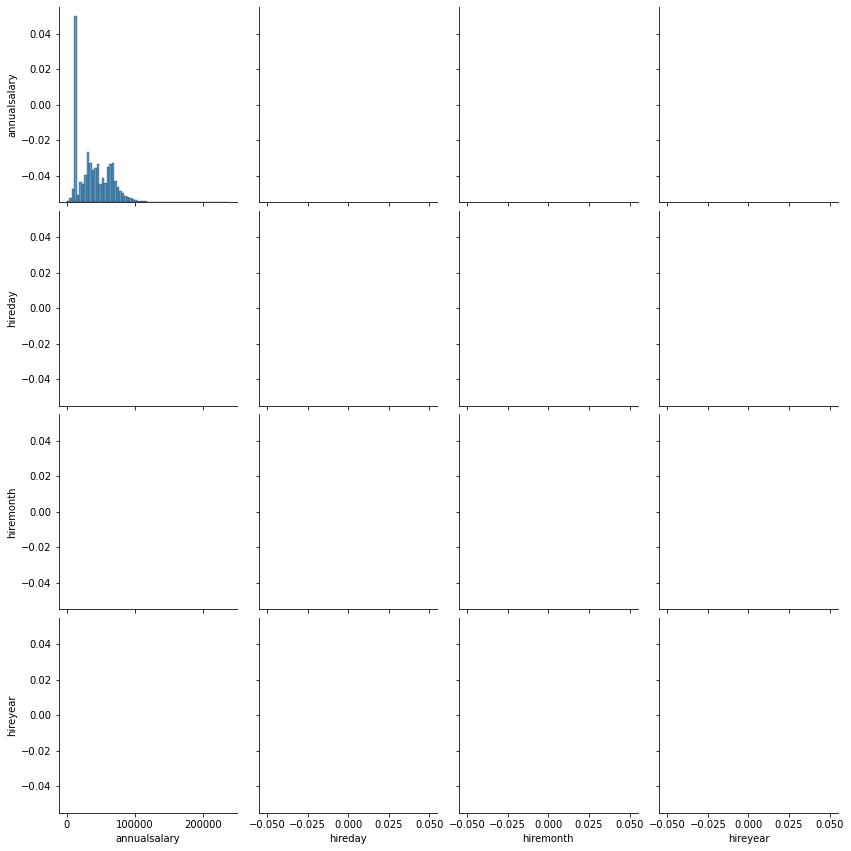

In [79]:
# Plot a pairplot
sns.pairplot(newdf,size=3)

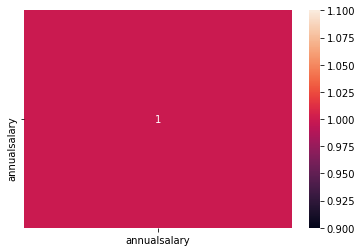

In [80]:
# Plot a heatmap
sns.heatmap(dumm.corr(),annot=True)

# Machine Learning

* Train test Split

* Data Preprocessing - Feauture Scaling

* Choose the model

In [81]:
model = SVR()

* Train the model

* Test the model

* Performance Metrics

* Conclusion

In [ ]:
If an employee joins on the following date: 02/09/2018, 04,04/2015, 21/12/2021, predict the salaries.